In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
len(x_train) #查看訓練資料數

60000

In [5]:
len(x_test)  #查看測試資料數

10000

(28, 28)


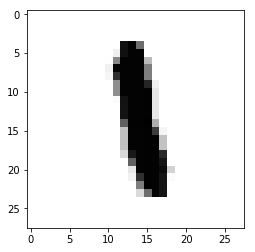

In [6]:
X = x_train[9487]
print(X.shape)
plt.imshow(X,cmap='Greys') #秀出9487編號的圖看看

In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [8]:
print(x_train.shape)
print(x_test.shape) #確認是否reshape成功

(60000, 784)
(10000, 784)


In [9]:
#進化版模型中對x進行normalize
x_train_improved = x_train/x_train.max()
x_test_improved = x_test/x_test.max()

In [10]:
#對y進行one-hot encoding
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [11]:
 y_train[9487]  #查看9487編號的y是否轉換成功

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
#引進模型所需套件
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import Dropout

In [13]:
#老師原始版model
model = Sequential()

model.add(Dense(4,input_dim=784)) #第一層:四個神經元
model.add(Activation('sigmoid'))

model.add(Dense(2)) #第二層:兩個神經元
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180.0
Trainable params: 3,180.0
Non-trainable params:

In [14]:
#訓練老師原始版model
model_his = model.fit(x_train,y_train,batch_size=100,epochs=20) 

Epoch 1/20
60000/60000 [==============================] - 1s - loss: 0.0903 - acc: 0.1022     
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.0901 - acc: 0.1031     
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.0900 - acc: 0.1552     
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.0898 - acc: 0.1748     
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.0897 - acc: 0.1240     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0896 - acc: 0.1124     
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.0895 - acc: 0.1124     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.0894 - acc: 0.1124     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.0893 - acc: 0.1124     
Epoch 10/20
60000/60000 [==============================] - 1s - loss: 0.0892 - acc: 0.1124     
Epoch 11/20
60000/60000 [========================

In [15]:
#架設進化版model
model_improved = Sequential()

model_improved.add(Dense(20,input_dim=784)) #第一層:二十個神經元
model_improved.add(Activation('relu'))

model_improved.add(Dense(25)) #第二層:二十五個神經元
model_improved.add(Activation('relu'))

model_improved.add(Dense(20)) #第二層:二十個神經元
model_improved.add(Activation('relu'))

model_improved.add(Dense(10))
model_improved.add(Activation('softmax'))

model_improved.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model_improved.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 25)                525       
_________________________________________________________________
activation_5 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                520       
_________________________________________________________________
activation_6 (Activation)    (None, 20)                0         
_________________________________________________________________
den

In [16]:
#訓練進化版model
model_improved_his = model_improved.fit(x_train_improved,y_train,batch_size=100,epochs=20,verbose = 1,validation_data = (x_test_improved,y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.5767 - acc: 0.8229 - val_loss: 0.2710 - val_acc: 0.9219
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.2396 - acc: 0.9307 - val_loss: 0.2175 - val_acc: 0.9368
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.1985 - acc: 0.9424 - val_loss: 0.1830 - val_acc: 0.9438
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.1745 - acc: 0.9491 - val_loss: 0.1727 - val_acc: 0.9491
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.1578 - acc: 0.9543 - val_loss: 0.1604 - val_acc: 0.9522
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.1456 - acc: 0.9575 - val_loss: 0.1607 - val_acc: 0.9527
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.1350 - acc: 0.9599 - val_loss: 0.1553 - val_acc: 0.9525
Epoch 8/20
60000/60000 [==============================] - 1s 

In [17]:
from ipywidgets import interact_manual

In [18]:
predict = model.predict_classes(x_test)

 7328/10000 [====================>.........] - ETA: 0s

In [19]:
predict_improved = model_improved.predict_classes(x_test)

 9504/10000 [===========================>..] - ETA: 0s

In [20]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict[測試編號])

In [21]:
def test_improved(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict_improved[測試編號])

In [22]:
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [23]:
interact_manual(test_improved,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test_improved(測試編號)>

In [24]:
score = model.evaluate(x_test,y_test)
score_improved = model_improved.evaluate(x_test_improved,y_test)

print('-----------老師版-----------')
print(f'loss:{score[0]}')
print(f'正確率:{score[1]}')

print('-----------進化版-----------')
print(f'loss:{score_improved[0]}')
print(f'正確率:{score_improved[1]}')

 9184/10000 [==========================>...] - ETA: 0s-----------老師版-----------
loss:0.08798681131601334
正確率:0.1135
-----------進化版-----------
loss:0.1407874954157509
正確率:0.9633


<function matplotlib.pyplot.show(*args, **kw)>

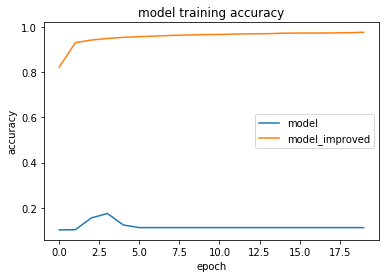

In [25]:
plt.plot(model_his.history['acc'])
plt.plot(model_improved_his.history["acc"])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["model","model_improved"],loc = "best")
plt.show

### 心得:
#### 改良model的過程中，首先調整了activation function成relu，並將loss function改成categorical_crossentropy，而優化器則是Adam，在這樣的設定下發現效果會高於老師的原始模型，但準確率卻會在80幾快90的時候無法再提升，即使epoch調到500，準確率也高不上去了。
#### 後來猜想是因為模型的learning太高，造成loss無法繼續收斂，便將learning rate調低，並將layer的神經元增加。
#### 結果validation的準確率竟能夠在個位數的epoch就高達九十幾!